## Разделение train-validation-test

Самым простым способом научиться чему-либо является "запомнить всё".

Вспомним "Таблицу умножения". Если мы хотим проверить умение умножать, то проверки примерами из таблицы умножения будет недостаточно, ведь она может быть полностью запомнена. Нужно давать новые примеры, которых не было в таблице умножения (обучающей выборке).

Если модель "запомнит всё", то она будет идеально работать на данных, которые мы ей показали, но может вообще не работать на любых других данных.

С практической точки зрения важно, как модель будет вести себя именно на незнакомых для неё данных. То есть, насколько хорошо она научилась обобщать закономерности, которые в данных присутствовали (если они вообще существуют).

Для оценки этой способности набор данных разделяют на две, а иногда даже на три части:

* **train** — данные, на которых модель учится;
* **validation/test** — данные, на которых идет проверка.

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/split_dataset_for_train_val_test.png" width="1000">


Произвести разделение на тренировочную и тестовую части можно напрямую.

Загружаем набор данных MNIST, который содержится в torchvision.datasets. MNIST содержит 60 000 изображений для обучения и 10 000 изображений для теста, размеченных на 10 классов — по числу цифр. Каждый пример представляет собой изображение размером 28×28 пикселей в оттенках серого. Каждое изображение имеет метку класса — то, какая цифра на нем изображена.

При загрузке MNIST укажем следующие параметры:
* `root` — это путь, куда будут скачаны данные,
* `train` определяет, скачивать обучающую или тестовую часть набора данных,
* `download=True` позволяет скачать данные из интернета, если их нет в пути `root`,
*  `transform` определяет преобразования, которые нужно сделать с данными. Здесь мы сразу указываем `transform=ToTensor()`, чтобы перевести входные данные (изображения) в формат `torch.Tensor`. Подробнее о трансформациях поговорим далее.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets
from torchvision.transforms import ToTensor
from IPython.display import clear_output

In [ ]:
train_data_MNIST = datasets.MNIST(
    root="./MNIST", train=True, download=True, transform=ToTensor()
)

test_data_MNIST = datasets.MNIST(
    root="./MNIST", train=False, download=True, transform=ToTensor()
)

clear_output()

print("Train data info:\n", train_data_MNIST)
print("\nTest data info:\n", test_data_MNIST)

print('Sample of image: ', train_data_MNIST[0])
print('Label of this image: ', train_data_MNIST[0][1])

Train data info:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

Test data info:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./MNIST
    Split: Test
    StandardTransform
Transform: ToTensor()
Sample of image:  (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


Можно обращаться к элементам `Dataset`-а вручную, как в списках или массивах: `dataset[i]`. При таком обращении мы получим кортеж `(sample, label)`. Воспользуемся matplotlib, чтобы отобразить первые 10 изображений из тестового множества.

Функция squeeze() удаляет все одномерные размерности, входящие в тензор.
Функция transpose применяется к векторам numpy и векторам tensor, но их значение различается. Понять разницу между применением этой функции к разным типам.
Задание: понять, где применить функцию squeeze() или transpose() в приведённом ниже коде.

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


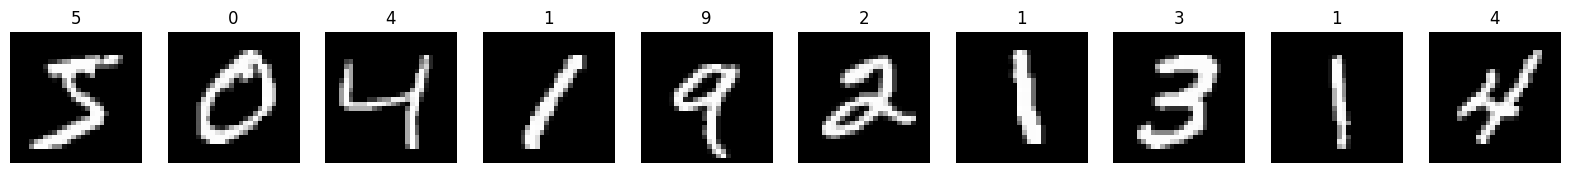

In [ ]:
import matplotlib.pyplot as plt

num_imgs_to_visualize = 10

figure = plt.figure(figsize=(20, 20))

for i in range(num_imgs_to_visualize):
    # here we indexing the Dataset-object "as is" and gettig a tuple (img, label)
    img, label = train_data_MNIST[i]
    print(img.shape)
    print(img.squeeze().shape)

    figure.add_subplot(1, num_imgs_to_visualize, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    #plt.imshow(np.transpose(img, (1, 2, 0)), cmap="gray")
    plt.title(label)
    plt.axis("off")
plt.show()

Задание. Скачать набор данных CIFAR10 (не забыть добавить классы) и вывести 5 картинок с подписями над каждой из них.

In [ ]:
cifar10 = datasets.CIFAR10(root="./CIFAR10", train=True, download=True, transform=ToTensor())

100%|██████████| 170498071/170498071 [00:03<00:00, 47180217.08it/s]


Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10


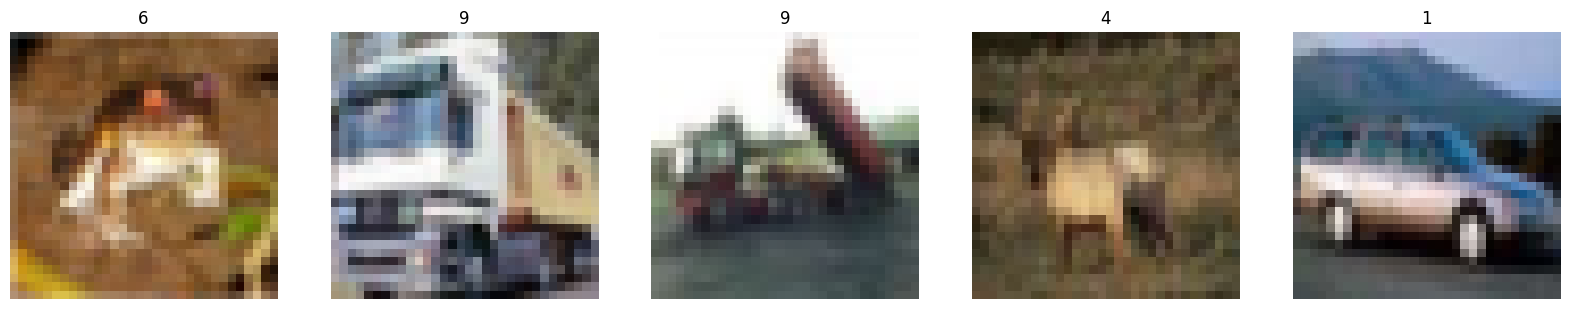

In [ ]:
num_imgs_to_visualize = 5

figure = plt.figure(figsize=(20, 20))

for i in range(num_imgs_to_visualize):
    img, label = cifar10[i]

    figure.add_subplot(1, num_imgs_to_visualize, i + 1)
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(label)
    plt.axis("off")

plt.show()

Задание. Скачать набор данных FashionMNIST (не забыть добавить классы) и вывести 10 картинок с подписями над каждой из них.

In [ ]:
F_MNIST = datasets.FashionMNIST(root="./FashionMNIST", train=True, download=True, transform=ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 16608609.75it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 299519.21it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5487016.19it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11962480.33it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



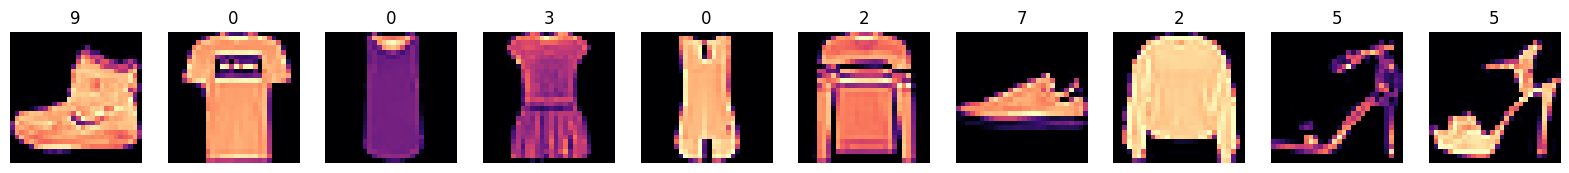

In [ ]:
num_imgs_to_visualize = 10

figure = plt.figure(figsize=(20, 20))

for i in range(num_imgs_to_visualize):
    img, label = F_MNIST[i]

    figure.add_subplot(1, num_imgs_to_visualize, i + 1)
    plt.imshow(np.transpose(img, (1, 2, 0)), cmap="magma")
    plt.title(label)
    plt.axis("off")

plt.show()

## Использование метода train_test_split библиотеки sclearn

Разберём параметры train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None):
*arrays - массивы, которые необходимо разделить на тренировочную и тестовую части;
test_size и train_size - размеры выборок, показывают долю (от 0 до 1) каждой части, можно указать всего один из этих параметров;
random_state - управляет перемешиванием данных перед разделением, любое натуральное число, которое фиксирует случайность;
shuffle - отвечает за перемешивание данных;
stratify - если значение не None, данные разбиваются послойно, используя это в качестве меток классов.

Рассмотрим пример работы с табличными данными.

Загрузим датасет. Мы должны увидеть, что он содержит два числовых признака — часы и результаты.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/student_scores.csv"
)
print(dataset.shape)
dataset.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Разделим наши данные на train и test, выведем их размерности:

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, -1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

(20, 1)
(5, 1)


Задание. Создать два множества: X натуральных чисел от 0 до 9, представить его в виде вектора размерности $5 \times 2$, y - одномерный вектор натуральных чисел от 0 до 4. Разбить их на X_train, X_test, y_train, y_test методом train_test_split в соотношении 2 к 1.

In [ ]:
X = torch.arange(10).reshape(5,2)
y = torch.arange(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Классы для более удобной работы с данными

Классы torch.utils.data.DataLoader и torch.Tensor torch.utils.data.Dataset служат для упрощения и ускорения загрузки данных и экономии памяти.
Предварительная обработка данных часто сильно зависит от домена, предметной области, самих данных. В идеале мы бы хотели, чтобы код, относящийся к набору данных, был отделен от кода для обучения модели для его лучшей читаемости, понимаемости и модульности.

`Dataset` хранит в себе объекты (samples, сэмплы) — например, изображения и соответствующие им метки (labels, targets).

`DataLoader` представляет из себя итерируемый объект — обертку над `Dataset`-ом, и позволяет получить простой доступ к объектам и меткам из набора данных в виде мини-батчей.


<img src="https://edunet.kea.su/repo/EduNet-content/L05/out/dataset_dataloader.png" width="2000">

Библиотеки из семейства PyTorch предоставляют ряд предзагруженных наборов данных (например, таких как MNIST), которые релизованы как дочерние классы от `torch.utils.data.Dataset` и несут в себе функции, специфичные для конкретных данных. Эти наборы данных могут быть использованы как бенчмарк для отладки и оценки вашей модели или в учебных целях. Вы можете найти их здесь: [Image Datasets](https://pytorch.org/vision/stable/datasets.html), [Text Datasets](https://pytorch.org/text/stable/datasets.html), и [Audio Datasets](https://pytorch.org/audio/stable/datasets.html).

`Dataset` возвращает по одной паре "объект — метка" за раз. При обучении моделей мы обычно хотим получать обекты в виде мини-батчей, перемешивая данные на каждой эпохе для уменьшения переобучения.

`DataLoader` — это объект, который позволяет нам получать такие мини-батчи. При инициализации он принимает в себя объект `Dataset`, а также параметры `batch_size` (размер мини-батча) и `shuffle` (перемешивать ли данные в батчах каждую эпоху).

Другие параметры, а также значения по умолчанию можно посмотреть в документации PyTorch для класса [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [ ]:
from torch.utils.data import DataLoader

train_dataloader_MNIST = DataLoader(train_data_MNIST, batch_size=8, shuffle=True)

test_dataloader_MNIST = DataLoader(test_data_MNIST, batch_size=8, shuffle=False)

## Итерирование по набору данных

После загрузки набора данных бывает удобно посмотреть на несколько экземпляров картинок, например. Чтобы не загружать память, удобнее воспользоваться итератором:

<class 'torch.Tensor'>
tensor(0)
torch.Size([1, 28, 28])


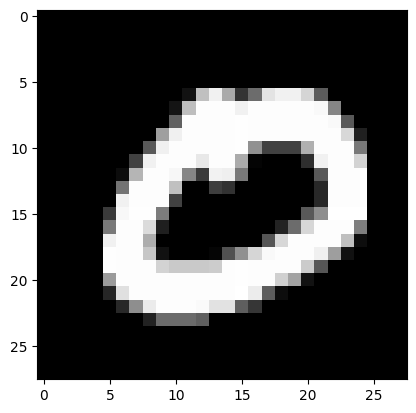

In [ ]:
images, label = next(iter(train_dataloader_MNIST))
print(type(images))
print(label[0])
image = images[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

Так как мы имели два объекта класса `Dataset`: `train_data` и `test_data`, то мы создаем также и два независимых `DataLoader`-а. Один из них позволит нам получать батчи из обучающей выборки, а другой — из тестовой.

Обратите внимание на параметр `shuffle`! По умолчанию он имеет значение `False`. **Для обучения нейронной сети критически важно, чтобы во время обучения батчи обучающих данных перемешивались**. Именно таким образом мы вносим **стохастичность** в процесс градиентного спуска. Поэтому для `DataLoader`-a, который будет выдавать батчи для обучения, необходимо использовать `shuffle=True`.

В противоположность этому — `DataLoader` для тестовых данных. Тестовые данные служат для оценки качества работы модели, на них не происходит обучение и градиентный спуск. Поэтому установка здесь `shuffle=True` не имеет большого смысла.

Мы загрузили набор данных в `DataLoader`, и теперь можем проходиться по нему по мере необходимости. Каждая итерация в коде ниже будет возвращать мини-батч в виде кортежа тензоров `(samples, labels)`, содержащих `batch_size=8` объектов и меток соответственно.
Так как мы установили для `train_dataloader` параметр `shuffle=True`, когда мы пройдемся по всем батчам, данные перемешаются.

Images batch shape: torch.Size([8, 1, 28, 28]) : [batch_size, num_channels, H, W]
Labels batch shape: torch.Size([8])

The first sample in the batch:


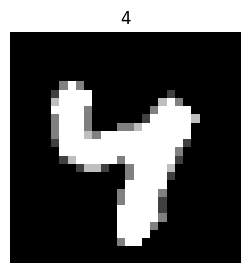

In [ ]:
# get one next batch
imgs, labels = next(iter(train_dataloader_MNIST))

print(f"Images batch shape: {imgs.size()} : [batch_size, num_channels, H, W]")
print(f"Labels batch shape: {labels.size()}")

print("\nThe first sample in the batch:")
# получить доступ до изображения и его этикетки
img = imgs[0].squeeze()
label = labels[0].item()

plt.figure(figsize=(3, 3))
plt.imshow(img, cmap="gray")
plt.title(label)
plt.axis("off")
plt.show()

Задание: загрузить Dataloader и набор данных CIFAR10. Вывести на экран первое из изображений с подписью.

In [ ]:
train_dataloader_cifar = DataLoader(cifar10, batch_size=8, shuffle=True)

test_dataloader_cifar = DataLoader(cifar10, batch_size=8, shuffle=False)

Теперь при обращении к данным через `DataLoader` будет происходить следующее:

1. Объект `DataLoader` обращается к объекту `Dataset` за данными, чтобы сформировать батч.
2. `Dataset` считывает данные, которые хранятся на диске, в формате PIL Image, применяет к ним трансформации, указанные в его атрибуте `.transform` (в данном случае это последовательность `ToTensor` и `Normalize`), и возвращает `DataLoader`-у преобразованные данные.
3. `DataLoader` формирует из полученных данных батч и возвращает его.

## Трансформации

Во время загрузки данных с ними бывает нужно сделать некоторые преобразования. За это отвечает параметр [transforms](https://pytorch.org/vision/stable/transforms.html#transforms) - по ссылке можно посмотреть все возможные трансформации.


Задание.

Применить трансформации к тренировочным данным: случайный поворот на 30 градусов; обрезать случайную часть изображения и изменить размерность до 224 пикселей; перевернуть изображение по горизонтали случайным образом; перевести в тензор.

Применть трансформации к тестовым данным: изменить размер до 255 пикселей; обрезать изображение по центру и изменить размерность до 224 пикселей; перевести в тензор.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

In [ ]:
zip_file_path = '/content/drive/MyDrive/Datasets/Cat_Dog_data.zip'
extracted_folder = 'Cat_Dog_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torchvision import transforms


data_dir = 'Cat_Dog_data/Cat_Dog_data'
dataset = datasets.ImageFolder(data_dir)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30), transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(p=0.5,), transforms.PILToTensor()])

test_transforms = transforms.Compose([transforms.Resize(225), transforms.RandomResizedCrop(224), transforms.PILToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

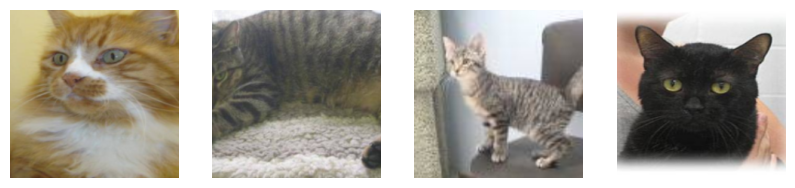

In [ ]:
data_iter = iter(testloader)

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

## Параметры и гиперпараметры модели

Настраиваемые параметры, с помощью которых мы можем управлять процессом обучения, называются **гиперпараметрами**. В дальнейшем мы столкнемся с другими гиперпараметрами. Например, мы
можем попробовать использовать другую модель, и выбор модели тоже станет гиперпараметром решаемой задачи.

**Гиперпараметры** — это настройки модели, которые определяют её общую структуру и способ обучения. Эти параметры устанавливаются до начала процесса обучения и не изменяются в процессе обучения модели. Гиперпараметры оказывают влияние на то, как модель будет обучаться, какие признаки будут учитываться, и какие ограничения будут наложены на процесс обучения. Примерами гиперпараметров могут быть количество слоев и нейронов в нейронной сети, скорость обучения, шаг градиентного спуска, коэффициент регуляризации и т.д.

**Параметры** модели, с другой стороны, являются внутренними весами или коэффициентами, которые модель обучает в процессе обучения на основе обучающих данных. Эти параметры изменяются в процессе обучения с целью минимизации функции потерь и достижения наилучшего соответствия между прогнозами модели и реальными значениями целевой переменной. В случае нейронных сетей, параметры включают веса между нейронами в разных слоях.

**Различие между гиперпараметрами и параметрами модели** заключается в том, что гиперпараметры задаются вручную до начала обучения и определяют характеристики всего процесса обучения, в то время как параметры модели вычисляются в процессе обучения на основе данных и оптимизируются для достижения наилучшей производительности. Гиперпараметры можно сравнить с настройками инструмента, с помощью которого вы создаете модель, а параметры модели - это результат работы этого инструмента на конкретных данных.

**Кросс-валидация** — произвести **несколько разбиений** датасета на **обучающий и валидационный** по какой-то схеме, чтобы получить уверенность оценок качества для моделей с разными гиперпараметрами.

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/cross_validation_on_train_data.png" width="500">

Часто применяется следующий подход, называемый [K-Fold кросс-валидацией](https://scikit-learn.org/stable/modules/cross_validation.html):

Берется тренировочная часть датасета, разбивается на части — блоки. Дальше мы будем использовать для проверки первую часть (Fold 1), а на остальных учиться. И так последовательно для всех частей. В результате у нас будет информация о точности для разных фрагментов данных, и уже на основании этого мы сможем понять, насколько значение параметра, который мы проверяем, зависит или не зависит от данных. То есть, если у нас от разбиения точность при одном и том же К меняться не будет, значит, мы подобрали правильное К. Если она будет сильно меняться в зависимости от того, на каком куске данных мы проводим тестирование, значит, надо попробовать другое К, и если ни при каком не получилось, то проблема заключается в данных.

**Можно ли делать только кросс-валидацию (без теста)?**

Нет, нельзя. Кросс-валидация не до конца спасает от подгона параметров модели под выборку, на которой она проводится. Оценка конечного качества модели должно производиться на отложенной тестовой выборке. Если у вас очень мало данных, можно рассмотреть [вложенную кросс-валидацию](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).

**Кросс-валидация: на что обратить внимание**

При кросс-валидации, чтобы получить адекватную оценку метрик, следует соблюдать те же правила, что и при разбиении на train и test, а именно:
* избегать дублирования данных,
* перемешивать упорядоченные данные и сохранять баланс классов,
* разделять данные из различных источников.

Для подбора параметров модели используется **GridSearchCV**.

GridSearchCV – это инструмент для автоматического подбора параметров моделей машинного обучения. GridSearchCV находит наилучшие параметры путем обычного перебора: он создает модель для каждой возможной комбинации параметров из заданной сетки.

Альтернативой GridSearch является [RandomizedSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Если в GridSearch поиск параметров происходит по фиксированному списку значений, то RandomizedSearch умеет работать с непрерывными значениями, случайно выбирая тестируемые значения, что может привести к более точной настройке гиперпараметров.